## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 6 (демо). Линейная регрессия, Lasso и RF-регрессия в задаче по определению качества вина</center>
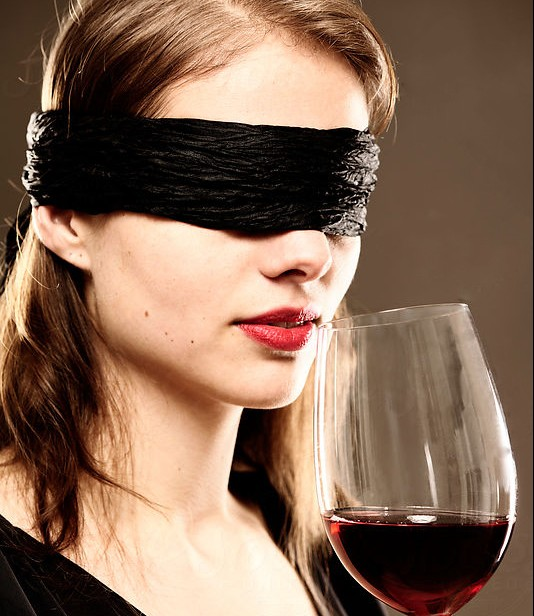

**Заполните пропущенный код и ответьте на вопросы в [онлайн-форме](https://docs.google.com/forms/d/1gsNxgkd0VqidZp4lh9mnCQnJw3b0IFR1C4WBES86J40).**

In [ ]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics.regression import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler

**Будем работать с набором данных по качеству белого вина (репозиторий UCI).**
**Загружаем данные.**

In [ ]:
data = pd.read_csv('data/winequality-white.csv', sep=';')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Отделите целевой признак, разделите обучающую выборку в отношении 7:3 (30% - под оставленную выборку, пусть random_state=17) и отмасштабируйте данные с помощью StandardScaler.**

In [ ]:
y = data['quality'] # Ваш код здесь
X = data.drop(columns='quality')

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17) # Ваш код здесь
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ваш код здесь
X_holdout_scaled = scaler.transform(X_holdout) # Ваш код здесь

## Линейная регрессия

**Обучите простую линейную регрессию.**

In [ ]:
linreg = LinearRegression(n_jobs=-1) # Ваш код здесь
linreg.fit(X_train_scaled, y_train) # Ваш код здесь

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

**<font color='red'>Вопрос 1:</font> Каковы среднеквадратичные ошибки линейной регрессии на обучающей и отложенной выборках?**

In [ ]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg.predict(X_train_scaled))) # Ваш код здесь
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled))) # Ваш код здесь

Mean squared error (train): 0.558
Mean squared error (test): 0.584


**Посмотрите на коэффициенты модели и отранжируйте признаки по влиянию на качество вина (учтите, что большие по модулю отрицательные значения коэффициентов тоже говорят о сильном влиянии). Создайте для этого новый небольшой DataFrame.**<br>
**<font color='red'>Вопрос 2:</font> Какой признак линейная регрессия считает наиболее сильно влияющим на качество вина?**

In [ ]:
linreg_coef = pd.DataFrame(linreg.coef_, index=X.columns, columns=['coef']) # Ваш код здесь
linreg_coef['abs_coef'] = np.abs(linreg_coef['coef'])
linreg_coef.sort_values(by='abs_coef', ascending=False) # Ваш код здесь

,coef,abs_coef
density,-0.665720,0.665720
residual sugar,0.538164,0.538164
volatile acidity,-0.192260,0.192260
pH,0.150036,0.150036
alcohol,0.129533,0.129533
fixed acidity,0.097822,0.097822
sulphates,0.062053,0.062053
free sulfur dioxide,0.042180,0.042180
total sulfur dioxide,0.014304,0.014304
chlorides,0.008127,0.008127


In [ ]:
linreg_coef.sort_values(by='abs_coef', ascending=False).head(1).index[0]

'density'

## Lasso-регрессия

**Обучите Lasso-регрессию с небольшим коэффициентом $\alpha = 0.01$ (слабая регуляризация). Пусть опять random_state=17.**

In [ ]:
lasso1 = Lasso(alpha=0.01, random_state=17) # Ваш код здесь
lasso1.fit(X_train_scaled, y_train) # Ваш код здесь 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=17,
      selection='cyclic', tol=0.0001, warm_start=False)

**Посмотрите на коэффициенты модели и отранжируйте признаки по влиянию на качество вина. Какой признак "отвалился" первым, то есть наименее важен для объяснения целевого признака в модели Lasso?**

In [ ]:
lasso1_coef = pd.DataFrame(lasso1.coef_, index=X.columns, columns=['coef']) # Ваш код здесь
lasso1_coef['abs_coef'] = np.abs(lasso1_coef['coef'])
lasso1_coef.sort_values(by='abs_coef', ascending=False) # Ваш код здесь

,coef,abs_coef
alcohol,0.322425,0.322425
residual sugar,0.256363,0.256363
density,-0.235492,0.235492
volatile acidity,-0.188479,0.188479
pH,0.067277,0.067277
free sulfur dioxide,0.043088,0.043088
sulphates,0.029722,0.029722
chlorides,-0.002747,0.002747
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000


**Теперь определите лучшее значение $\alpha$ в процессе кросс-валидации 5-кратной кросс-валидации. Используйте LassoCV и random_state=17.**

In [ ]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=17, n_jobs=-1) # Ваш код здесь
lasso_cv.fit(X_train_scaled, y_train) # Ваш код здесь

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
lasso_cv.alpha_

0.0002833096101839324

**Выведите коэффициенты "лучшего" Lasso в порядке убывания влияния на качество вина. **<br>
**<font color='red'>Вопрос 3:</font> Какой признак "обнулился первым" в настроенной модели LASSO?**

In [ ]:
lasso_cv_coef = pd.DataFrame(lasso_cv.coef_, index=X.columns, columns=['coef']) # Ваш код здесь
lasso_cv_coef['abs_coef'] = np.abs(lasso_cv_coef['coef'])
lasso_cv_coef.sort_values(by='abs_coef', ascending=False) # Ваш код здесь

,coef,abs_coef
density,-0.648161,0.648161
residual sugar,0.526883,0.526883
volatile acidity,-0.192049,0.192049
pH,0.146549,0.146549
alcohol,0.137115,0.137115
fixed acidity,0.093295,0.093295
sulphates,0.060939,0.060939
free sulfur dioxide,0.042698,0.042698
total sulfur dioxide,0.012969,0.012969
chlorides,0.006933,0.006933


**Оцените среднеквадратичную ошибку модели на обучающей и тестовой выборках.**<br>
**<font color='red'>Вопрос 4:</font> Каковы среднеквадратичные ошибки настроенной LASSO-регрессии на обучающей и отложенной выборках?**

In [ ]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))) # Ваш код здесь
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, lasso_cv.predict(X_holdout_scaled)))# Ваш код здесь

Mean squared error (train): 0.558
Mean squared error (test): 0.583


## Случайный лес

**Обучите случайный лес с параметрами "из коробки", фиксируя только random_state=17.**

In [ ]:
forest = RandomForestRegressor(random_state=17, n_estimators=10) # Ваш код здесь, 10 деревьев, иначе ответ не тот
forest.fit(X_train_scaled, y_train) # Ваш код здесь

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

**<font color='red'>Вопрос 5:</font> Каковы среднеквадратичные ошибки случайного леса на обучающей выборке, на кросс-валидации (cross_val_score с scoring='neg_mean_squared_error' и остальными параметрами по умолчанию) и на отложенной выборке?**

In [ ]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, forest.predict(X_train_scaled))) # Ваш код здесь
print("Mean squared error (cv): %.3f" % np.mean(np.abs(cross_val_score(forest, X_train_scaled, y_train, scoring='neg_mean_squared_error')))) # Ваш код здесь
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, forest.predict(X_holdout_scaled)))# Ваш код здесь

Mean squared error (train): 0.075
Mean squared error (cv): 0.455
Mean squared error (test): 0.422


**Настройте параметры min_samples_leaf и max_depth с помощью GridSearchCV и опять проверьте качество модели на кросс-валидации и на отложенной выборке.**

In [ ]:
forest_params = {'max_depth': list(range(10, 25)), 
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(forest, forest_params, n_jobs=-1, scoring='neg_mean_squared_error') # Ваш код здесь
locally_best_forest.fit(X_train_scaled, y_train) # Ваш код здесь

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=17,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 19, 'max_features': 7, 'min_samples_leaf': 1},
 -0.4346482183911514)

**К сожалению, результаты  GridSearchCV не полностью воспроизводимы (могут отличаться на разных платформах даже при фиксировании *random_state*). Поэтому обучите лес с параметрами max_depth=19, max_features=7, и min_samples_leaf=1 (лучшие в моем случае).**<br>
**<font color='red'>Вопрос 6:</font> Каковы среднеквадратичные ошибки настроенного случайного леса на обучающей выборке, на кросс-валидации (cross_val_score с scoring='neg_mean_squared_error') и на отложенной выборке?**

In [ ]:
# Ваш код здесь
forest2 = RandomForestRegressor(max_depth=19, max_features=7, min_samples_leaf=1, random_state=17, n_estimators=10)
forest2.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

In [ ]:
print("Mean squared error (cv): %.3f" % -cross_val_score(forest2, X_train_scaled, y_train, scoring='neg_mean_squared_error', n_jobs=-1).mean()) # Ваш код здесь
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, forest2.predict(X_holdout_scaled))) # Ваш код здесь

Mean squared error (cv): 0.435
Mean squared error (test): 0.410


**Оцените важность признаков с помощью случайного леса.**<br>
**<font color='red'>Вопрос 7:</font> Какой признак оказался главным в настроенной модели случайного леса?**

In [ ]:
rf_importance = pd.DataFrame(forest2.feature_importances_, index=X.columns, columns=['coef']) # Ваш код здесь
rf_importance['abs_coef'] = np.abs(rf_importance['coef'])
rf_importance.sort_values(by='abs_coef', ascending=False) # Ваш код здесь

,coef,abs_coef
alcohol,0.224432,0.224432
volatile acidity,0.119393,0.119393
free sulfur dioxide,0.116147,0.116147
pH,0.072806,0.072806
total sulfur dioxide,0.071318,0.071318
residual sugar,0.070160,0.070160
density,0.069367,0.069367
chlorides,0.067982,0.067982
fixed acidity,0.064268,0.064268
citric acid,0.062945,0.062945


**Сделайте выводы о качестве моделей и оценках влияния признаков на качество вина с помощью этих трех моделей.**